In [1]:
%load_ext autoreload
%autoreload 1

%aimport utils
import pandas as pd
import numpy as np
import os
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [2]:
countries = ['USA', 'Europe', 'JPN']

# Use Sharpe Ratio to measure if the portfolio is optimal
metric = 'sharpe'
po_dict = {}

for country in countries:
    display(HTML('<h2>%s</h2>' % country))

    # Build PortfolioOptimizer
    aqr = utils.load_aqr_data(country).dropna()
    portfolios = utils.build_portfolio(aqr, main_weights=[0.7],
                                       prefix_names=['main'],
                                       include_mkt=True)
    rf = aqr['RF'].dropna()
    mkt = aqr['MKT'].dropna()
    po = utils.PortfolioOptimizer(portfolios=portfolios, riskfree=rf,
                                  market=mkt, country=country)

    # Calculate Sharpe Ratio Per Month Per Portfolio
    display(HTML('<h3>%s</h3>' % metric))
    display(po.get_stats_table(metric=metric).head(3))
    
    # Calculate Optimal Indicator
    display(HTML('<h3>%s</h3>' % 'Indicators'))
    display(po.get_best_indicators().head(3))
    
    # Calculate the best returns by using Optimal Indicator
    display(HTML('<h3>%s</h3>' % 'Optimal Returns'))
    display(po.get_best_returns().head(3))
    
    # Store Optimizer
    po_dict[country] = po
    display(HTML('<hr>'))

,equal_weights,main_QUA,main_SMB,main_HMLFF,main_UMD,MKT_MKT
DATE,,,,,,
1957-07-01,-2.879321,1.685316,-3.317260,-2.552402,-2.610759,0.370399
1957-08-01,0.565690,0.983760,-0.879194,0.685571,0.900232,-4.143094
1957-09-01,4.974207,3.005973,2.166092,2.723875,1.964573,-6.029730


,equal_weights,main_QUA,main_SMB,main_HMLFF,main_UMD,MKT_MKT
DATE,,,,,,
1957-07-01,NaN,1.0,NaN,NaN,NaN,NaN
1957-08-01,NaN,1.0,NaN,NaN,NaN,NaN
1957-09-01,1.0,NaN,NaN,NaN,NaN,NaN


DATE
1957-07-01   -0.001061
1957-07-02   -0.000846
1957-07-03    0.000411
dtype: float64

,equal_weights,main_QUA,main_SMB,main_HMLFF,main_UMD,MKT_MKT
DATE,,,,,,
1993-07-01,3.091477,-0.810666,0.672039,9.778099,-2.143875,0.956032
1993-08-01,2.813559,2.126367,2.023016,2.253419,-3.086895,6.903344
1993-09-01,3.716098,0.611679,3.324252,-1.100468,8.077502,-0.910327


,equal_weights,main_QUA,main_SMB,main_HMLFF,main_UMD,MKT_MKT
DATE,,,,,,
1993-07-01,NaN,NaN,NaN,1.0,NaN,NaN
1993-08-01,NaN,NaN,NaN,NaN,NaN,1.0
1993-09-01,NaN,NaN,NaN,NaN,1.0,NaN


DATE
1993-07-01    0.001444
1993-07-02   -0.001395
1993-07-05    0.001236
dtype: float64

,equal_weights,main_QUA,main_SMB,main_HMLFF,main_UMD,MKT_MKT
DATE,,,,,,
1993-07-01,-3.402084,-2.656814,-6.365963,1.888870,0.252624,4.284769
1993-08-01,-3.938427,-1.752651,-3.041733,-4.309772,0.020083,1.225766
1993-09-01,2.420368,9.283518,-0.166880,0.153973,-3.443716,-5.188033


,equal_weights,main_QUA,main_SMB,main_HMLFF,main_UMD,MKT_MKT
DATE,,,,,,
1993-07-01,NaN,NaN,NaN,NaN,NaN,1.0
1993-08-01,NaN,NaN,NaN,NaN,NaN,1.0
1993-09-01,NaN,1.0,NaN,NaN,NaN,NaN


DATE
1993-07-01    0.005474
1993-07-02   -0.018723
1993-07-05   -0.004026
dtype: float64

## Plotting

In [3]:
# Save the plot separately
plot_location = os.path.join(os.getcwd(), '..', 'Plots', 'Factor_Portfolio')

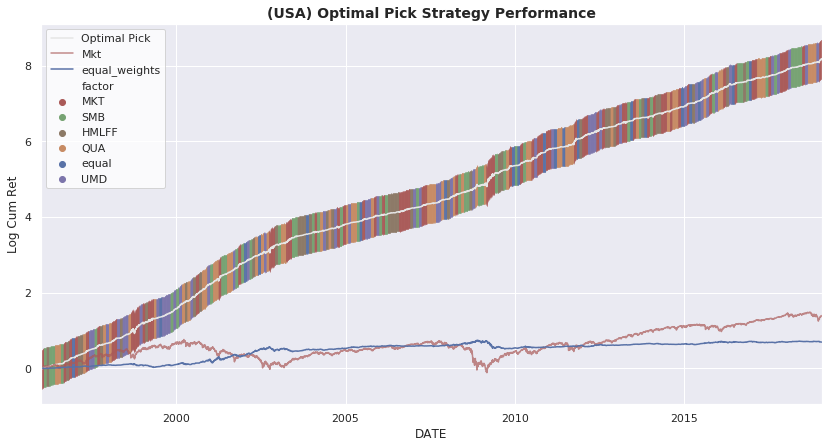

In [4]:
fig, ax = plt.subplots(1,1, figsize=(14, 7))

country = 'USA'
po_dict[country].plot_log_cum_returns(ax, start_time='1996-01-01')
ax.set_title('(%s) Optimal Pick Strategy Performance'% country,
             fontsize=14, fontweight=700)

fig.savefig(os.path.join(plot_location, 'portfolio_optimal_%s.pdf' % country),
            bbox_inches='tight')

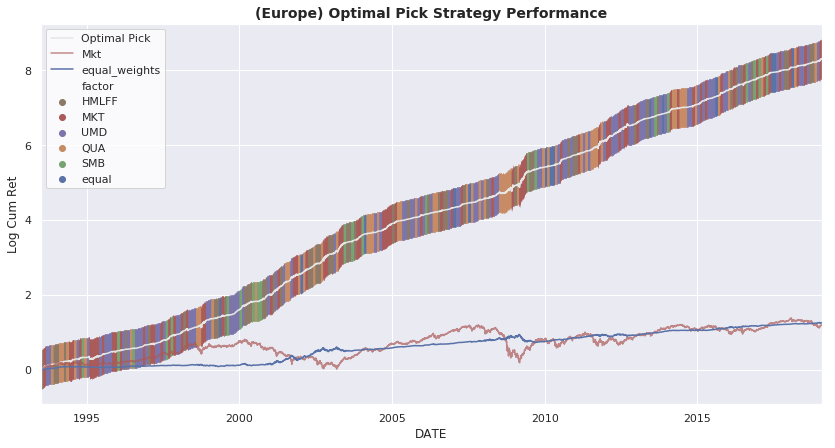

In [5]:
fig, ax = plt.subplots(1,1, figsize=(14, 7))

country = 'Europe'
po_dict[country].plot_log_cum_returns(ax)
ax.set_title('(%s) Optimal Pick Strategy Performance'% country,
             fontsize=14, fontweight=700)

fig.savefig(os.path.join(plot_location, 'portfolio_optimal_%s.pdf' % country),
            bbox_inches='tight')

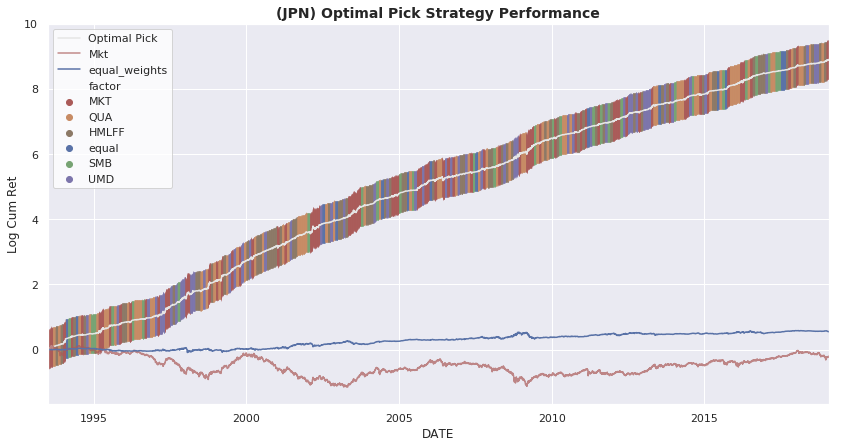

In [6]:
fig, ax = plt.subplots(1,1, figsize=(14, 7))

country = 'JPN'
po_dict[country].plot_log_cum_returns(ax)
ax.set_title('(%s) Optimal Pick Strategy Performance'% country,
             fontsize=14, fontweight=700)

fig.savefig(os.path.join(plot_location, 'portfolio_optimal_%s.pdf' % country),
            bbox_inches='tight')